<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/250827_%EC%BD%94%EB%94%A9%EC%8B%A4%EC%8A%B510_10_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC%EC%99%80%EC%95%99%EC%83%81%EB%B8%94(DT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 연동

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 한글처리

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 1. DT 회귀 실습


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X_reg, y_reg = fetch_california_housing(return_X_y=True)

In [ ]:
X_reg

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
y_reg

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

- _reg: 회귀의 관례적 표현
- _clf: 분류의 관례적 표현

In [ ]:
# 위 코드 판다스로 지정해 불러올 때

data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)

X_reg = df.values
y_reg = data.target

In [ ]:
X_reg

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
y_reg

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reg,y_reg, test_size=0.3, random_state=42)

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = dt_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('평균 제곱 오차(MSE) : ', mse)

평균 제곱 오차(MSE) :  0.5280096503174904


In [ ]:
dt_reg1 = DecisionTreeRegressor(max_depth=7,random_state=42)
dt_reg1.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=7, random_state=42)

In [ ]:
y_pred = dt_reg1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred)

print('평균 제곱 오차(MSE) : ', mse1)

평균 제곱 오차(MSE) :  0.45403267168795175


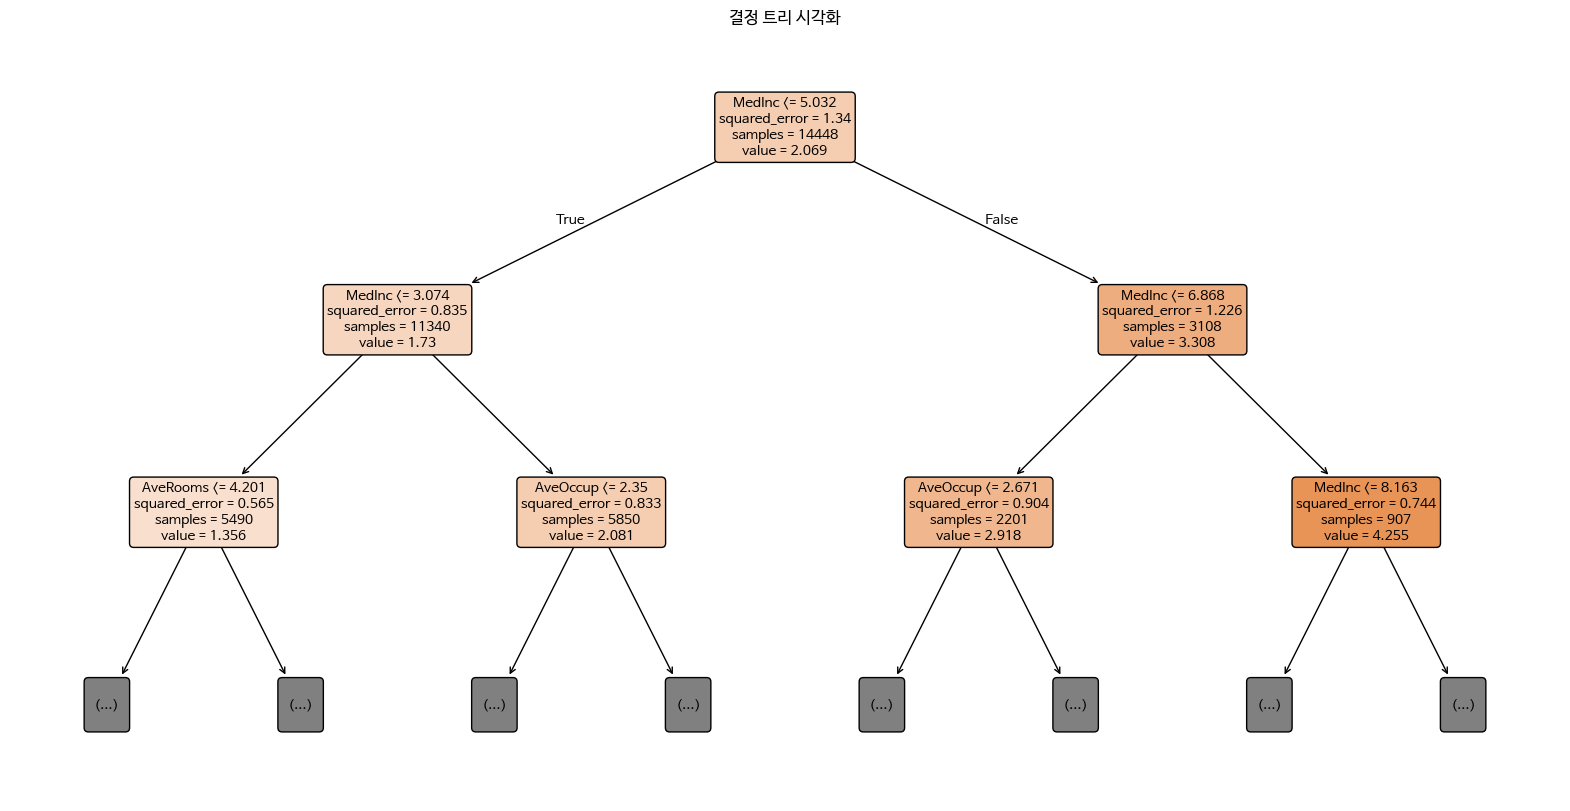

In [ ]:
from dataclasses import field
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
# 트리 시각화
plt.figure(figsize=(20,10))
plot_tree(dt_reg,
          max_depth=2,
        #   field=True,
          rounded=True,
          filled=True,
          fontsize=10,
          feature_names=data.feature_names,
          class_names=data.target_names
          )
plt.title("결정 트리 시각화")
plt.show()

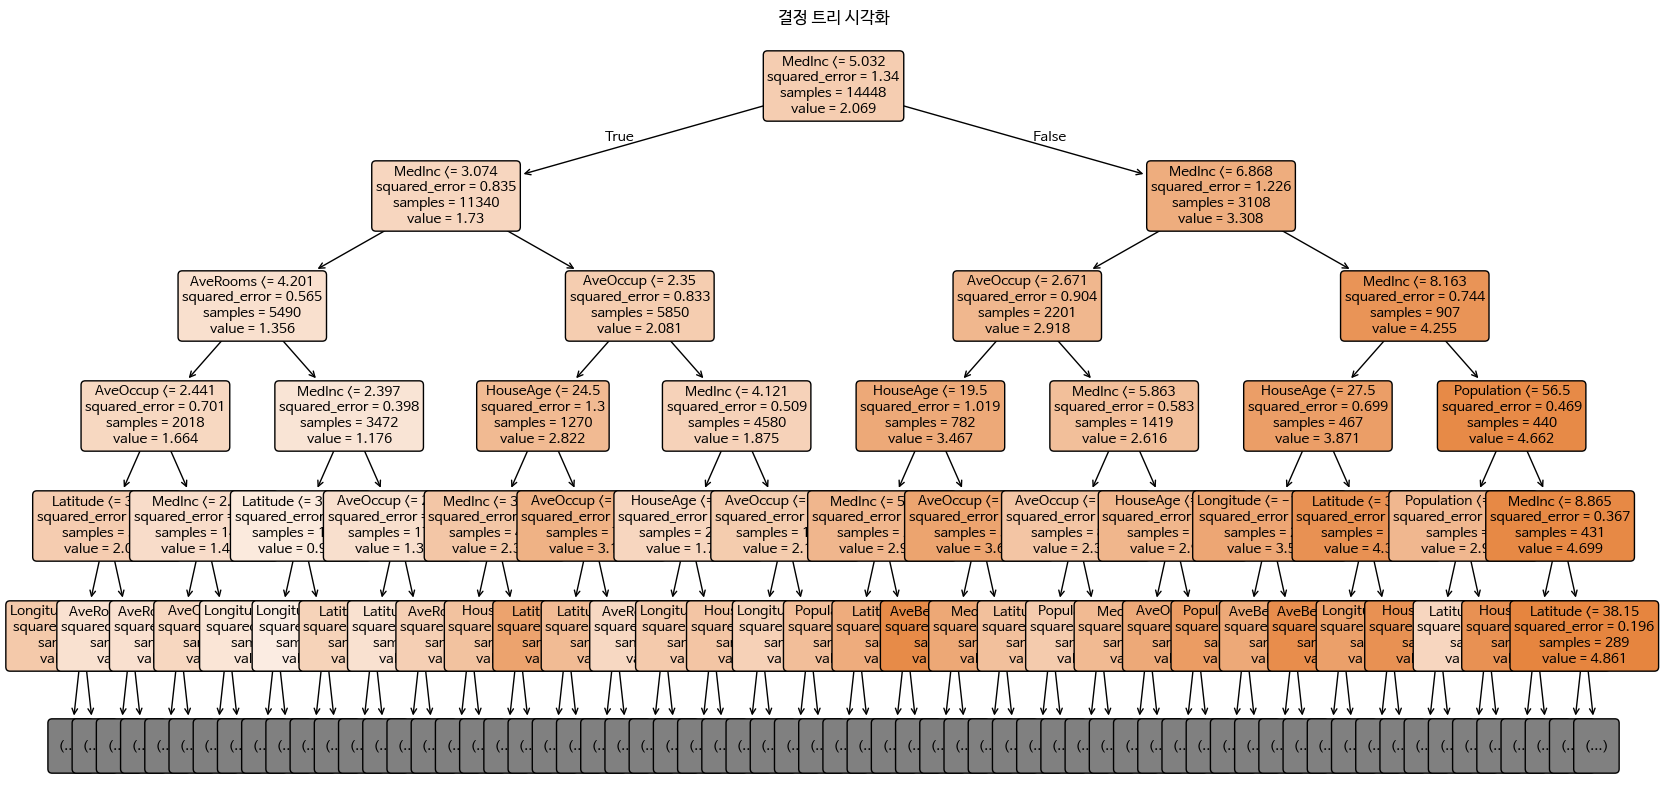

In [ ]:
# 트리 시각화
plt.figure(figsize=(20,10))
plot_tree(dt_reg,
          max_depth=5,
          rounded=True,
          filled=True,
          fontsize=10,
          feature_names=data.feature_names,
          class_names=data.target_names
          )
plt.title("결정 트리 시각화")
plt.show()

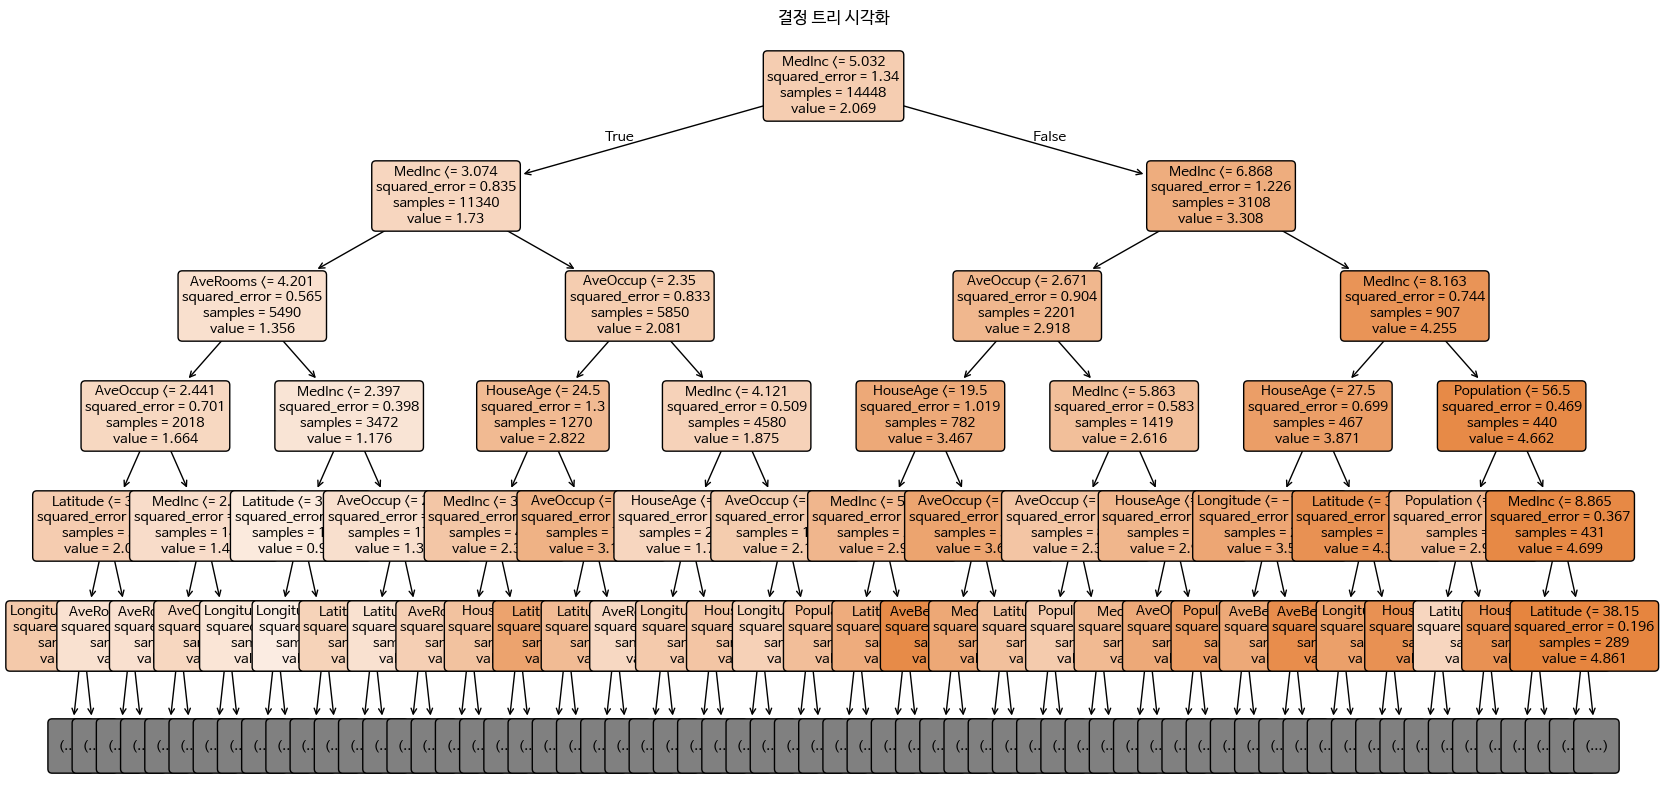

In [ ]:
# 트리 시각화
plt.figure(figsize=(20,10))
plot_tree(dt_reg,
          max_depth=5,
          rounded=True,
          filled=True,
          fontsize=10,
          feature_names=data.feature_names,
          class_names=data.target_names,
          impurity=True #불순도
          )
plt.title("결정 트리 시각화")
plt.show()

# 2. DT 분류 실습

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [ ]:
iris = load_iris()

In [ ]:
X_clf = iris.data
y_clf = iris.target

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
# 변수명 추출
feature_names = iris.feature_names
class_names = iris.target_names


In [ ]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

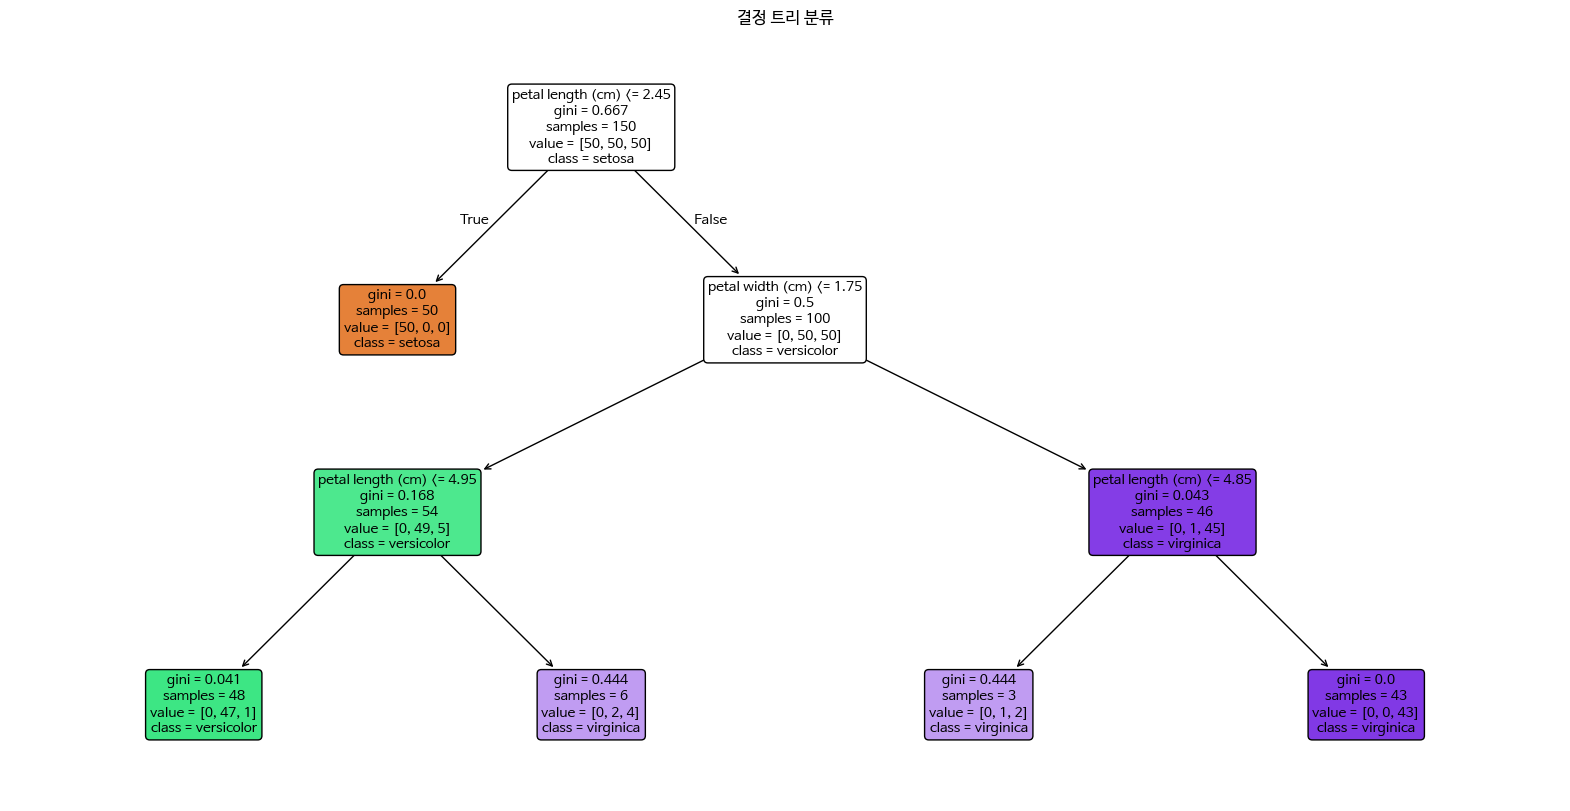

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_clf.fit(X_clf, y_clf)

plt.figure(figsize=(20,10))
plot_tree(dt_clf,
        #   max_depth=3,
          rounded=True,
          filled=True,
          fontsize=10,
          feature_names=feature_names,
          class_names=class_names,
          )
plt.title("결정 트리 분류")
plt.show()

In [ ]:
dt_clf.get_depth()

3

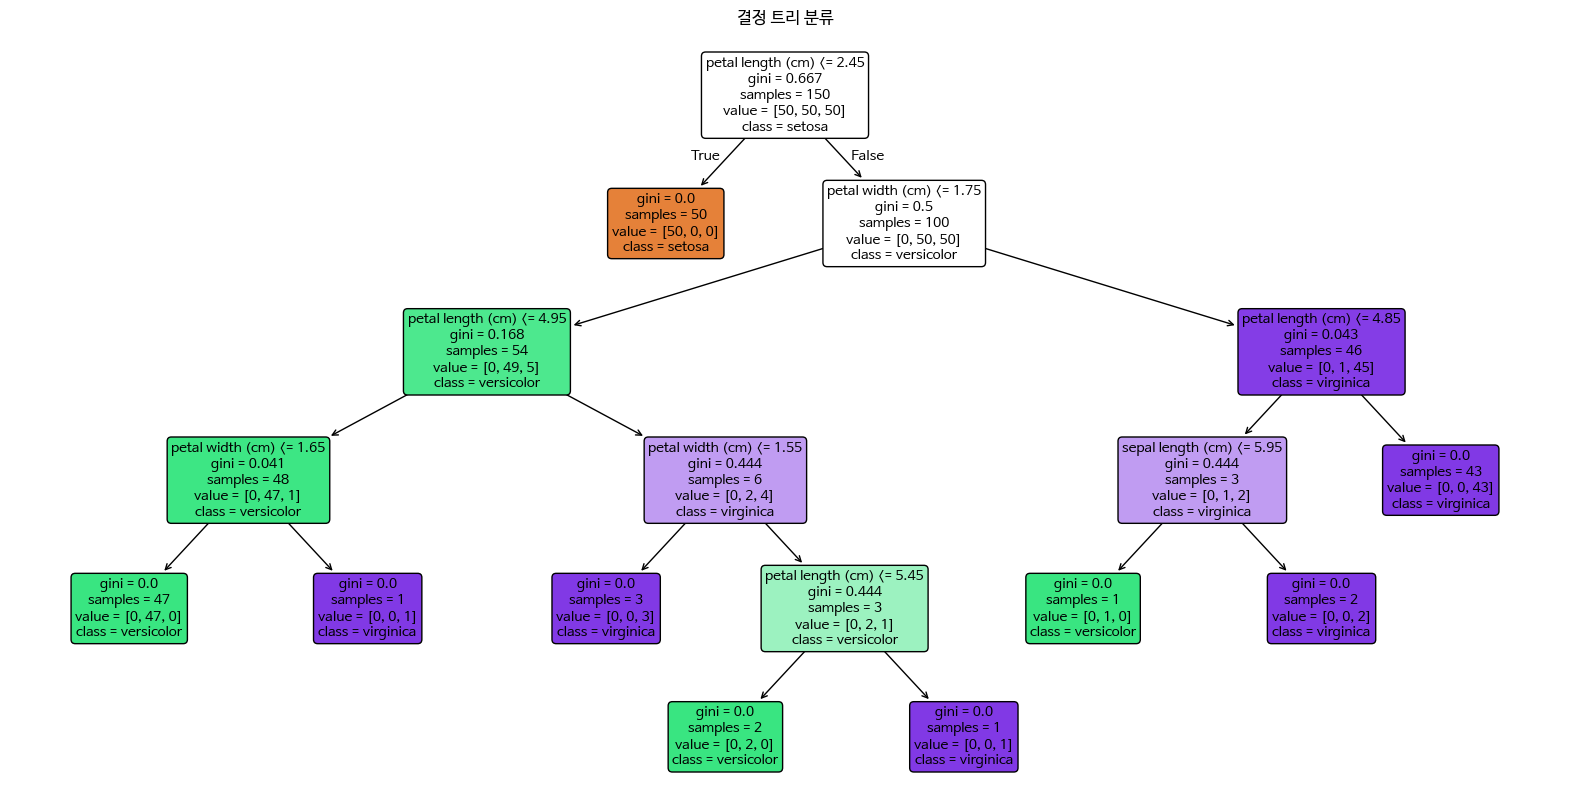

In [ ]:
dt_clf1 = DecisionTreeClassifier(random_state=42)
dt_clf1.fit(X_clf, y_clf)

plt.figure(figsize=(20,10))
plot_tree(
    dt_clf1,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("결정 트리 분류")
plt.show()

In [ ]:
dt_clf1.get_depth()

5

# 3. 속성 중요도 실습

In [ ]:
# 특성 이름 가져오기
feature_names = iris.feature_names

In [ ]:
# 각 특성의 중요도 값 가져오기
importances = dt_clf.feature_importances_

In [ ]:
importances

array([0.        , 0.        , 0.58561555, 0.41438445])

In [ ]:
importance_df = pd.DataFrame({
    'Feature' : feature_names,
    'Importance' : importances
    })
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
2,petal length (cm),0.585616
3,petal width (cm),0.414384
1,sepal width (cm),0.000000
0,sepal length (cm),0.000000


# 4. 사전 가지치기 실습

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
X_clf = iris.data
y_clf = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

In [ ]:
# 하이퍼 파라미터 조합
dt_model_2 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=10,
    max_features='sqrt'
)
dt_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)

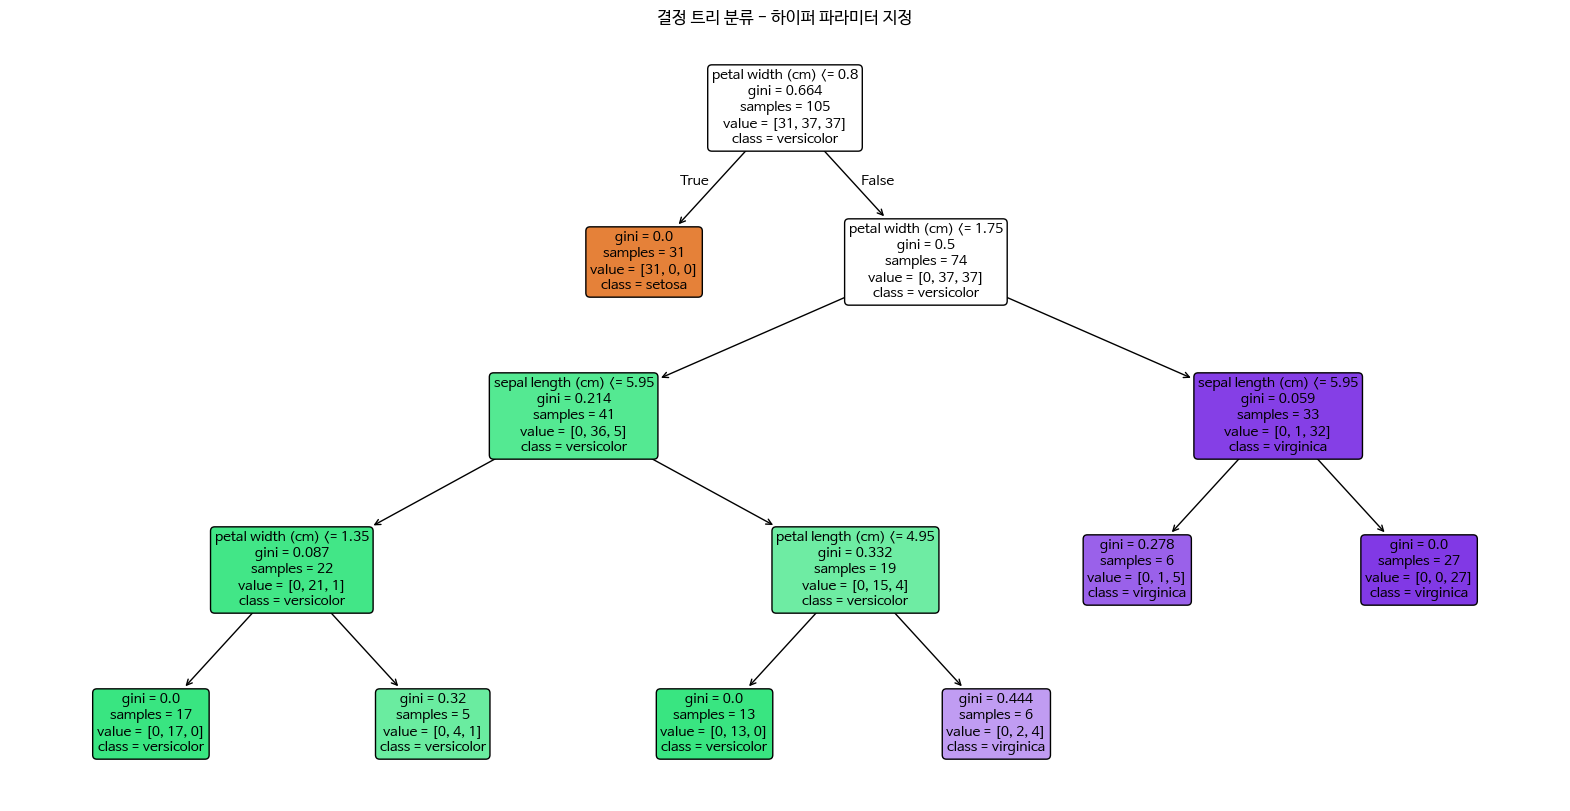

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_model_2,
        #   max_depth=5,
          rounded=True,
          filled=True,
          fontsize=10,
          feature_names=feature_names,
          class_names=class_names,
          )
plt.title('결정 트리 분류 - 하이퍼 파라미터 지정')
plt.show()